<a href="https://colab.research.google.com/github/Pakhi27/IPL-_TEAM-_PREDICTION/blob/main/IPL_team_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('deliveries.csv')
df_1=pd.read_csv('matches.csv')
df_2=pd.read_csv('teams.csv')
df_3=pd.read_csv('most_runs_average_strikerate.csv')
df_4=pd.read_csv('teamwise_home_and_away.csv')
df_5=pd.read_excel('Players.xlsx')

In [50]:
dataset=pd.DataFrame(df)
df
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs'],
      dtype='object')

In [66]:
# Concatenate along columns (i.e., side by side)
combined_df = pd.concat([df, df_1, df_2, df_3, df_4, df_5], axis=1)
combined_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,5.0,8.0,8.0,62.500000,62.500000,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,51.0,101.0,86.0,57.425743,59.302326,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,49.0,89.0,75.0,57.303371,65.333333,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,7.0,6.0,10.0,50.000000,70.000000,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,28.0,63.0,45.0,47.619048,62.222222,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [67]:
combined_df.isnull().sum()

match_id                    0
inning                      0
batting_team                0
bowling_team                0
over                        0
ball                        0
batsman                     0
non_striker                 0
bowler                      0
is_super_over               0
wide_runs                   0
bye_runs                    0
legbye_runs                 0
noball_runs                 0
penalty_runs                0
batsman_runs                0
extra_runs                  0
total_runs                  0
id                     178322
Season                 178322
city                   178329
date                   178322
team1                  178322
team2                  178322
toss_winner            178322
toss_decision          178322
result                 178322
dl_applied             178322
winner                 178326
win_by_runs            178322
win_by_wickets         178322
player_of_match        178326
venue                  178322
umpire1   

In [81]:
# Check the number of rows in each dataframe
print(df.shape)
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)
print(df_4.shape)
print(df_5.shape)

# Handling missing values by filling with a placeholder
combined_df.fillna(0, inplace=True)

# Alternatively, drop rows with missing values
combined_df.dropna(inplace=True)

# Optionally, inspect the combined dataframe
print(combined_df.head())



(179078, 18)
(756, 18)
(15, 1)
(516, 6)
(14, 7)
(566, 5)
   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  away_wins  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...        5.0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...       51.0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...       49.0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...        7.0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...       28.0   

   home_matches  

In [77]:
combined_df.isnull().sum()


match_id               0
inning                 0
batting_team           0
bowling_team           0
over                   0
ball                   0
batsman                0
non_striker            0
bowler                 0
is_super_over          0
wide_runs              0
bye_runs               0
legbye_runs            0
noball_runs            0
penalty_runs           0
batsman_runs           0
extra_runs             0
total_runs             0
id                     0
Season                 0
city                   0
date                   0
team1                  0
team2                  0
toss_winner            0
toss_decision          0
result                 0
dl_applied             0
winner                 0
win_by_runs            0
win_by_wickets         0
player_of_match        0
venue                  0
umpire1                0
umpire2                0
umpire3                0
team1                  0
batsman                0
total_runs             0
out                    0


<Axes: >

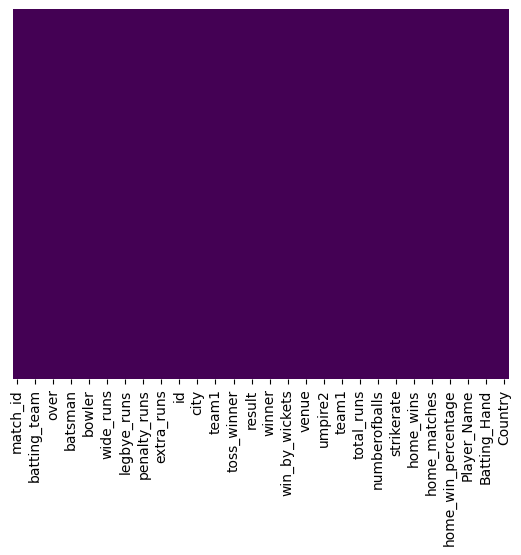

In [78]:
sns.heatmap(combined_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [74]:
combined_df['winner']

0                 Sunrisers Hyderabad
1              Rising Pune Supergiant
2               Kolkata Knight Riders
3                     Kings XI Punjab
4         Royal Challengers Bangalore
                     ...             
179073                        Unknown
179074                        Unknown
179075                        Unknown
179076                        Unknown
179077                        Unknown
Name: winner, Length: 179078, dtype: object

In [86]:
# Check if "unknown" is present in any cell
presence_of_unknown = (combined_df == 'Unknown').any().any()
if presence_of_unknown:
    print("The string 'Unknown' is present in the DataFrame.")

# Replace "unknown" with NaN
combined_df.replace('Unknown', np.nan, inplace=True)

In [89]:
combined_df['total_runs']

,total_runs,total_runs
0,0,5426.0
1,0,5386.0
2,4,4902.0
3,0,4717.0
4,2,4601.0
...,...,...
179073,1,NaN
179074,2,NaN
179075,1,NaN
179076,2,NaN


In [95]:
print(combined_df.dtypes)



match_id                        int64
inning                          int64
batting_team                   object
bowling_team                   object
over                            int64
ball                            int64
batsman                        object
non_striker                    object
bowler                         object
is_super_over                   int64
wide_runs                       int64
bye_runs                        int64
legbye_runs                     int64
noball_runs                     int64
penalty_runs                    int64
batsman_runs                    int64
extra_runs                      int64
total_runs                      int64
id                            float64
Season                         object
city                           object
date                           object
team1                          object
team2                          object
toss_winner                    object
toss_decision                  object
result      

In [99]:
import pandas as pd
import numpy as np

# Assuming 'combined_df' is your DataFrame and 'total_runs' is the column of interest

# Convert 'total_runs' to float to handle NaN values
combined_df['total_runs'] = combined_df['total_runs'].astype(float)

# Verify the dtype and check for NaN values
# print(combined_df['total_runs'].dtype)  # This should show float64
print(combined_df['total_runs'].isnull().sum())  # This will show the number of NaN values in 'total_runs'

# Calculate the mean of 'total_runs', ignoring NaN values
mean_total_runs = combined_df['total_runs'].mean()
print(f"Mean of total_runs: {mean_total_runs}")

# Replace NaN values with the mean in 'total_runs' column
combined_df['total_runs'].fillna(mean_total_runs, inplace=True)

# Verify that NaN values have been replaced
print(combined_df['total_runs'].isnull().sum())  # This should output 0 if all NaNs were replaced

# Optionally, convert back to integer if the mean replacement value and context make sense
# combined_df['total_runs'] = combined_df['total_runs'].astype(int)

# Inspect the first few rows to confirm the changes
print(combined_df.head())


total_runs         0
total_runs    178562
dtype: int64
Mean of total_runs: total_runs      1.313897
total_runs    430.625969
dtype: float64
total_runs         0
total_runs    178562
dtype: int64
   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  away_wins  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...        5.0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...       51.0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...       49.0   
3     4  DA Warner    S Dhawan

<ipython-input-99-106b63aad7a7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['total_runs'].fillna(mean_total_runs, inplace=True)


In [ ]:
# exploratory data analysis

In [72]:
combined_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'id', 'Season', 'city',
       'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result',
       'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3', 'team1',
       'batsman', 'total_runs', 'out', 'numberofballs', 'average',
       'strikerate', 'team', 'home_wins', 'away_wins', 'home_matches',
       'away_matches', 'home_win_percentage', 'away_win_percentage',
       'Player_Name', 'DOB', 'Batting_Hand', 'Bowling_Skill', 'Country'],
      dtype='object')

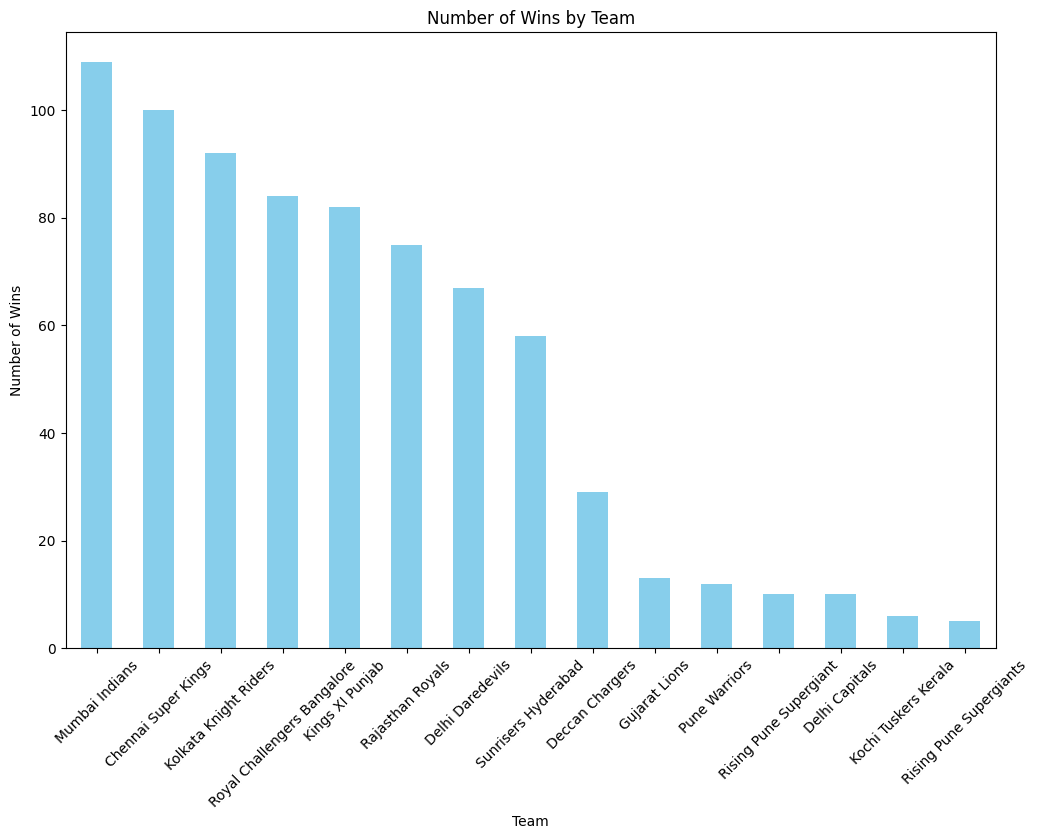

In [88]:
#  Team Performance
import matplotlib.pyplot as plt

# Assuming 'combined_df' is your dataframe and 'winner' column indicates the winning team
team_wins = combined_df['winner'].value_counts()

plt.figure(figsize=(12, 8))
team_wins.plot(kind='bar', color='skyblue')
plt.title('Number of Wins by Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


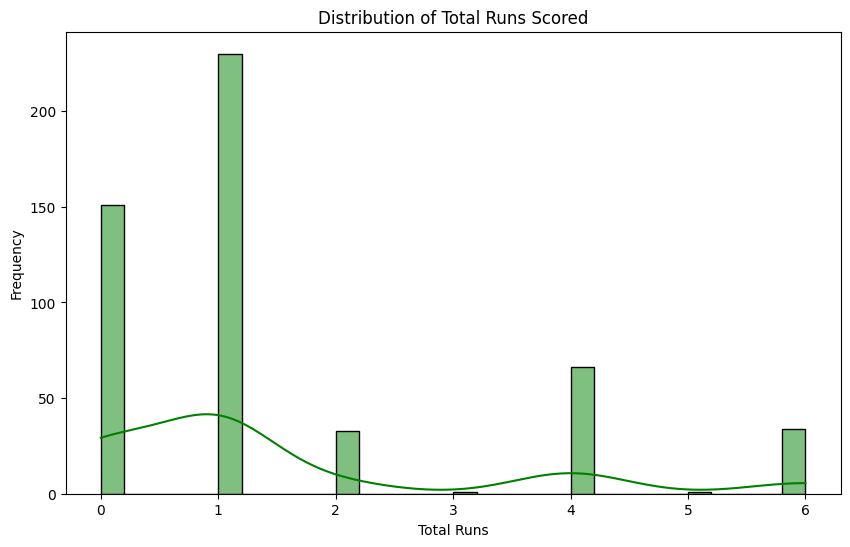

In [140]:
# Run Distribution
import seaborn as sns

# Distribution of total runs scored
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['total_runs'], bins=30, kde=True, color='green')
plt.title('Distribution of Total Runs Scored')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()


In [105]:
combined_df['team']

0         Rising Pune Supergiant
1                 Mumbai Indians
2            Chennai Super Kings
3                 Delhi Capitals
4            Sunrisers Hyderabad
                   ...          
179073                       NaN
179074                       NaN
179075                       NaN
179076                       NaN
179077                       NaN
Name: team, Length: 179078, dtype: object

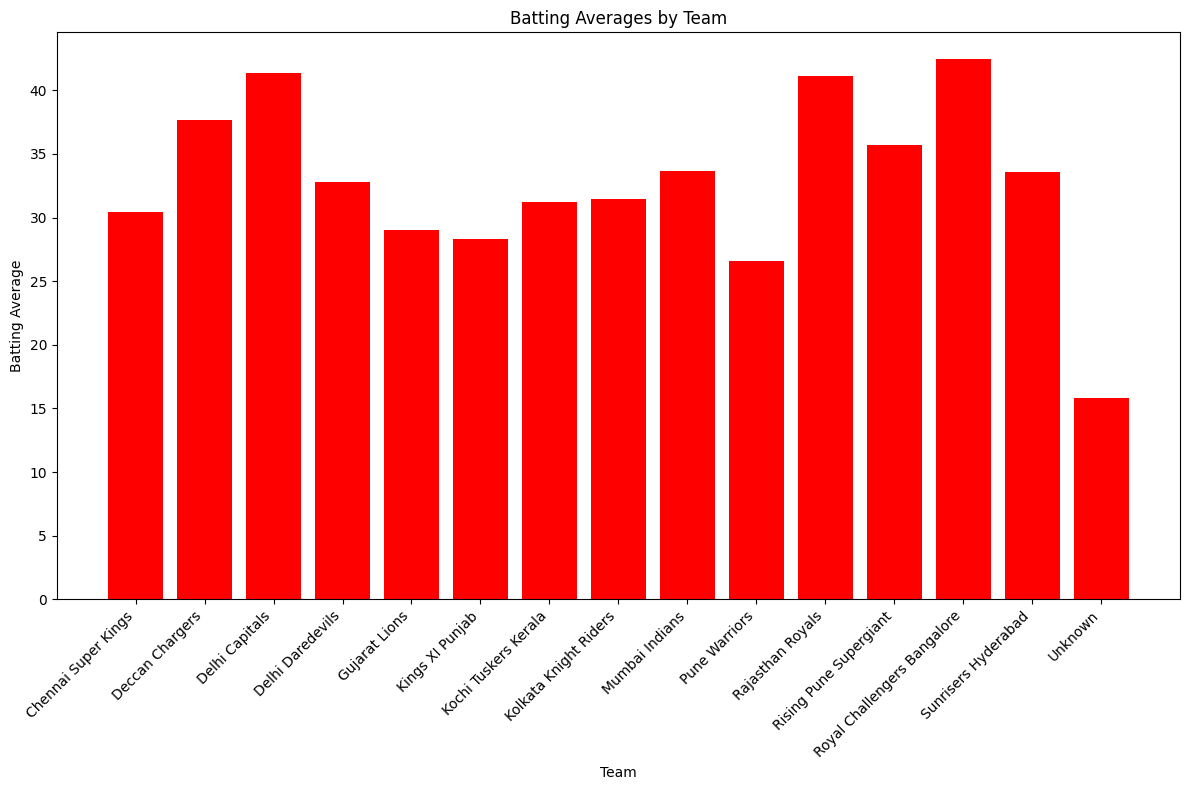

In [108]:
# Batting Averages
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'team' column contains strings and handle NaN values
combined_df['team'] = combined_df['team'].fillna('Unknown').astype(str)

# Group by 'team' and calculate the mean of the 'average' column
team_averages = combined_df.groupby('team')['average'].mean().reset_index()

# Sort the data by team name for consistent plotting (optional)
team_averages = team_averages.sort_values('team')

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(team_averages['team'], team_averages['average'], color='red')
plt.title('Batting Averages by Team')
plt.xlabel('Team')
plt.ylabel('Batting Average')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to ensure labels fit
plt.show()



In [111]:
combined_df['Season']

0         IPL-2017
1         IPL-2017
2         IPL-2017
3         IPL-2017
4         IPL-2017
            ...   
179073         nan
179074         nan
179075         nan
179076         nan
179077         nan
Name: Season, Length: 179078, dtype: object

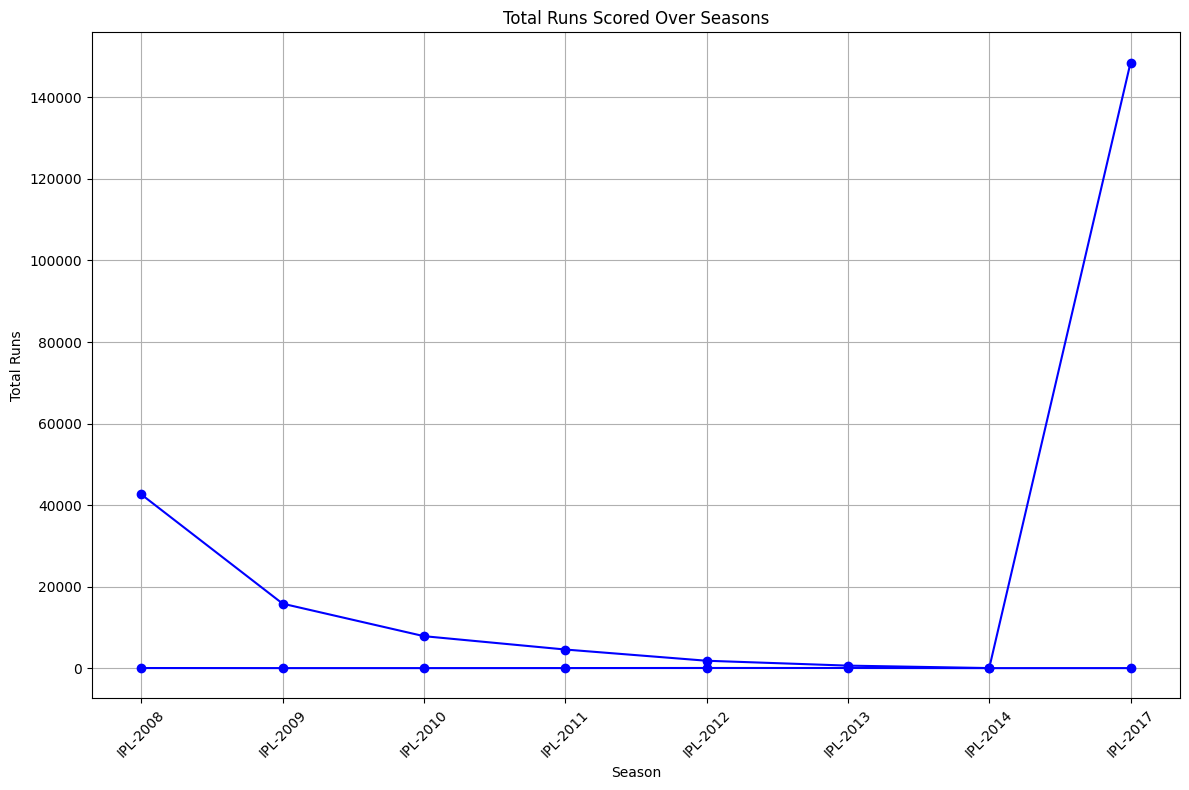

In [113]:
# total runs scored in each season
# : Performance Trends

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'combined_df' is your DataFrame and contains 'Season' and 'total_runs'

# Ensure 'Season' is correctly typed (e.g., as a string or category if necessary)
combined_df['Season'] = combined_df['Season'].astype(str)

# Remove rows with NaN values in 'Season' or 'total_runs'
combined_df = combined_df.dropna(subset=['Season', 'total_runs'])


# Group by 'Season' and calculate the total runs for each season
seasonal_runs = combined_df.groupby('Season')['total_runs'].sum().reset_index()

# Sort by 'Season' if necessary to maintain order in the plot
seasonal_runs = seasonal_runs.sort_values('Season')

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(seasonal_runs['Season'], seasonal_runs['total_runs'], marker='o', color='b', linestyle='-')
plt.title('Total Runs Scored Over Seasons')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to ensure labels fit
plt.grid(True)  # Optional: Add gridlines for better readability
plt.show()



In [136]:
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

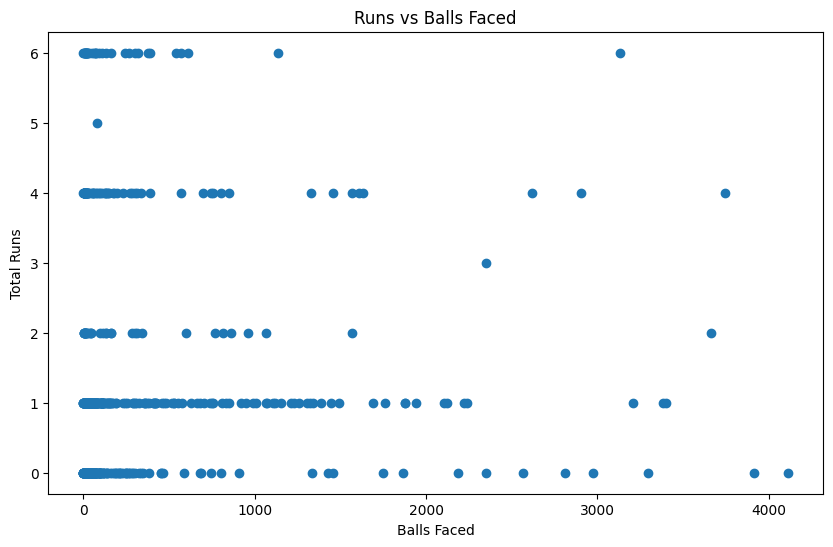

In [138]:
# Run Rate Analysis
# Scatter plot for runs vs balls faced
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['numberofballs'], combined_df['total_runs'])
plt.title('Runs vs Balls Faced')
plt.xlabel('Balls Faced')
plt.ylabel('Total Runs')
plt.show()


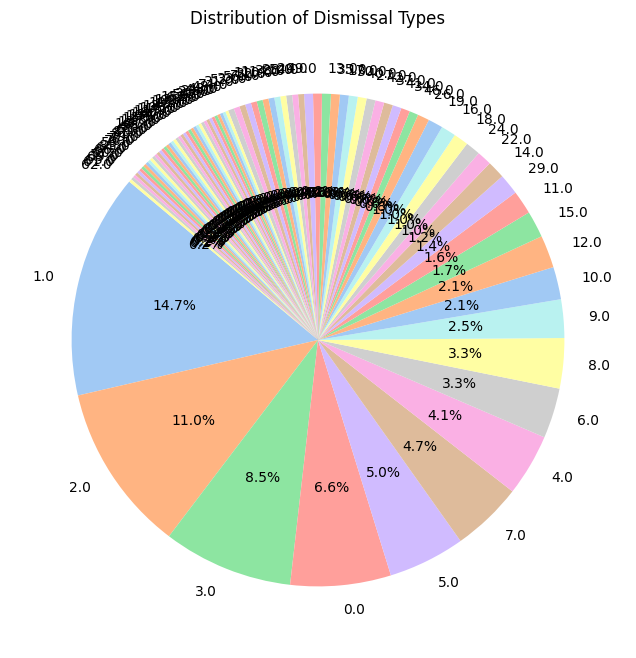

In [127]:
# Dismissal Types
# Assuming 'out' column indicates types of dismissals
dismissal_types = combined_df['out'].value_counts()

plt.figure(figsize=(12, 8))
dismissal_types.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Dismissal Types')
plt.ylabel('')
plt.show()


In [133]:
print(type(combined_df['total_runs']))
print(combined_df['total_runs'].head())
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]


<class 'pandas.core.series.Series'>
0    0.0
1    0.0
2    4.0
3    0.0
4    2.0
Name: total_runs, dtype: object


In [134]:
# Convert column to string, then to numeric
combined_df['total_runs'] = combined_df['total_runs'].astype(str)  # Convert to string first
combined_df['total_runs'] = pd.to_numeric(combined_df['total_runs'], errors='coerce')  # Convert to numeric

# Repeat for other columns if necessary
combined_df['average'] = combined_df['average'].astype(str)
combined_df['average'] = pd.to_numeric(combined_df['average'], errors='coerce')

combined_df['strikerate'] = combined_df['strikerate'].astype(str)
combined_df['strikerate'] = pd.to_numeric(combined_df['strikerate'], errors='coerce')


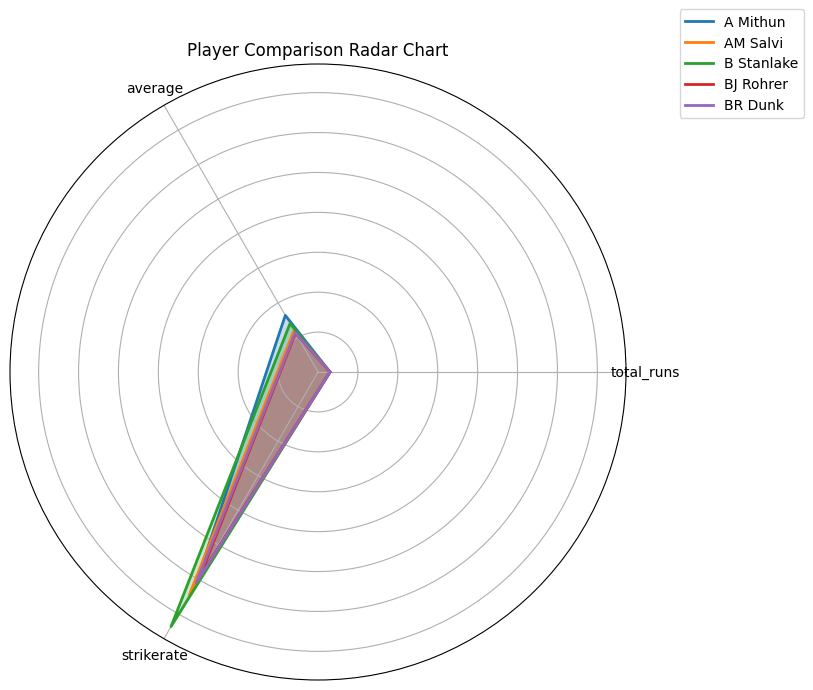

In [135]:
# Radar Chart: Player Comparison
# Group by 'Player_Name' and aggregate statistics
player_stats = combined_df.groupby('Player_Name').agg({
    'total_runs': 'sum',
    'average': 'mean',
    'strikerate': 'mean',
}).reset_index()

# Selecting top 5 players for comparison
players_to_compare = player_stats.nlargest(5, 'total_runs')

# Radar chart data preparation
categories = ['total_runs', 'average', 'strikerate']
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Plotting
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in players_to_compare.iterrows():
    values = row[categories].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=row['Player_Name'])
    ax.fill(angles, values, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Player Comparison Radar Chart')
plt.show()



In [141]:
combined_df.columns


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'id', 'Season', 'city',
       'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result',
       'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3', 'out',
       'numberofballs', 'average', 'strikerate', 'team', 'home_wins',
       'away_wins', 'home_matches', 'away_matches', 'home_win_percentage',
       'away_win_percentage', 'Player_Name', 'DOB', 'Batting_Hand',
       'Bowling_Skill', 'Country'],
      dtype='object')

In [142]:
combined_df['winner']

0              Sunrisers Hyderabad
1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
4      Royal Challengers Bangalore
                  ...             
511                Kings XI Punjab
512                 Mumbai Indians
513          Kolkata Knight Riders
514            Chennai Super Kings
515                Kings XI Punjab
Name: winner, Length: 516, dtype: object

In [151]:


# Assuming 'combined_df' is your DataFrame and 'team1' and 'team2' are the columns containing team names

# Combine both columns into a single Series
teams_combined = pd.concat([combined_df['team1'], combined_df['team2']])

# Count unique teams
unique_teams = teams_combined.unique()
total_teams = len(unique_teams)

print("Total number of unique teams:", total_teams)


Total number of unique teams: 13


In [ ]:
# Train-Test split

In [155]:
X = combined_df[['Season', 'team1', 'team2', 'toss_winner', 'toss_decision',
                 'home_win_percentage', 'away_win_percentage', 'total_runs',
                 'average', 'strikerate', 'numberofballs', 'venue']]

# Target variable
y = combined_df['winner']


In [156]:
# Convert categorical features to numerical values using one-hot encoding
# Purpose: Converts categorical variables (which contain non-numeric values) into numerical format using one-hot encoding.
# Explanation:
# pd.get_dummies(X, columns=[...]): This function creates a new DataFrame where each unique value in the specified columns is converted into a new binary column (0 or 1).
# For instance, if team1 has three possible values ('Team A', 'Team B', 'Team C'), one-hot encoding will create three new columns: team1_Team A, team1_Team B, and team1_Team C, with 1s and 0s indicating the presence of each team.
# Effect: This transforms categorical data into a format that can be used by machine learning models, which generally require numerical input.
X = pd.get_dummies(X, columns=['Season', 'team1', 'team2', 'toss_winner', 'toss_decision', 'venue'])

# Handle missing values (e.g., fill with 0 or another suitable value)
X = X.fillna(0)

# Convert the target variable to numeric if it's categorical
y = pd.Categorical(y).codes

In [178]:
X

,home_win_percentage,away_win_percentage,total_runs,average,strikerate,numberofballs,Season_IPL-2008,Season_IPL-2009,Season_IPL-2010,Season_IPL-2011,...,venue_Saurashtra Cricket Association Stadium,venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
0,62.500000,62.500000,0.0,35.697368,131.987351,4111.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57.425743,59.302326,0.0,33.662500,137.538304,3916.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,57.303371,65.333333,4.0,30.447205,130.999466,3742.0,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,50.000000,70.000000,0.0,41.377193,143.286756,3292.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,47.619048,62.222222,2.0,33.583942,125.538881,3665.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,0.000000,0.000000,1.0,0.000000,0.000000,13.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
512,0.000000,0.000000,1.0,0.000000,0.000000,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
513,0.000000,0.000000,0.0,0.000000,0.000000,9.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
514,0.000000,0.000000,0.0,0.000000,0.000000,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [157]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:

from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [177]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on test data
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Accuracy in %", accuracy_score(y_test, y_pred)*100)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5384615384615384
Accuracy in % 53.84615384615385
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.67      0.61        15
           1       0.00      0.00      0.00         2
           2       0.50      0.75      0.60         8
           3       0.00      0.00      0.00         1
           4       0.43      0.50      0.46        12
           5       0.00      0.00      0.00         1
           6       0.64      0.82      0.72        11
           7       0.60      0.67      0.63        18
           8       0.00      0.00      0.00         3
           9       0.67      0.62      0.64        13
          10       0.00      0.00      0.00         2
          11       0.50      0.50      0.50        10
          12       0.00      0.00      0.00         8

    accuracy                           0.54       104
   macro avg       0.30      0.35      0.32       104
weighted avg       0.47      0.54      0.50      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
from sklearn.metrics import confusion_matrix

In [150]:
print(confusion_matrix(y_test,y_pred))

[[10  0  2  0  1  0  1  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 1  0  6  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 1  0  1  0  6  0  1  1  0  1  0  1  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  9  0  0  0  0  0  0]
 [ 0  0  2  0  1  0  1 12  0  1  0  1  0]
 [ 2  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  1  1  0  0  0  0  1  0  8  0  1  0]
 [ 0  0  0  0  0  0  1  1  0  0  0  0  0]
 [ 1  1  0  0  1  0  0  1  0  1  0  5  0]
 [ 1  0  0  0  2  0  0  2  0  1  1  1  0]]


In [172]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [173]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
# Predict on test data
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Accuracy in %", accuracy_score(y_test, y_pred)*100)
print("Classification Report:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.5865384615384616
Accuracy in % 58.65384615384615
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.80      0.65        15
           1       0.25      0.50      0.33         2
           2       0.43      0.38      0.40         8
           3       0.00      0.00      0.00         1
           4       0.67      0.67      0.67        12
           5       0.00      0.00      0.00         1
           6       0.60      0.82      0.69        11
           7       0.65      0.72      0.68        18
           8       1.00      0.33      0.50         3
           9       0.55      0.46      0.50        13
          10       0.00      0.00      0.00         2
          11       0.62      0.50      0.56        10
          12       0.75      0.38      0.50         8

    accuracy                           0.59       104
   macro avg       0.47      0.43      0.42       104
weighted avg       0.58      0.59      0.57      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [175]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Accuracy in %", accuracy_score(y_test, y_pred)*100)
print("Classification Report:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.6826923076923077
Accuracy in % 68.26923076923077
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        15
           1       0.40      1.00      0.57         2
           2       0.60      0.75      0.67         8
           3       1.00      1.00      1.00         1
           4       0.67      0.67      0.67        12
           5       1.00      1.00      1.00         1
           6       0.62      0.91      0.74        11
           7       0.73      0.61      0.67        18
           8       0.50      0.67      0.57         3
           9       0.62      0.38      0.48        13
          10       1.00      0.50      0.67         2
          11       0.88      0.70      0.78        10
          12       1.00      0.62      0.77         8

    accuracy                           0.68       104
   macro avg       0.75      0.74      0.72       104
weighted avg       0.71      0.68      0.68      